# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [2]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [3]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    return((x**2)*numpy.sin(x))

Ensure your function works with numpy arrays:

In [4]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [5]:
def g(x):
    '''Analytical integral of f(x).'''
    return 2*x*numpy.sin(x)+(2-x**2)*numpy.cos(x)-2

Check your solution with the same numpy array:

In [6]:
assert g(0) == 0.

In [7]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [8]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return g(xmax)-g(xmin)

Check your analytic function:

In [9]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [10]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    del_x=(xmax-xmin)/N
    sum_sim = f(xmax)+f(xmin)
    val=xmin
    if N==1: #separating code for the case of N=1 versus the general function for N>1
        simpson = del_x/6 * (sum_sim+4*(f((xmax+xmin)/2))) #This separation just works better with how I use if statements
    else:
        for i in range(1,N):
            val+=del_x
            if i%2!=0:
                sum_sim+=4*f(val)
            else:
                sum_sim+=2*f(val)
        simpson=del_x/3 * sum_sim
    return simpson
    

Make sure you have implemented Simpson's rule correctly:

In [11]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [12]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,"Simpson's Rule: Fractional Error against Panel Count")

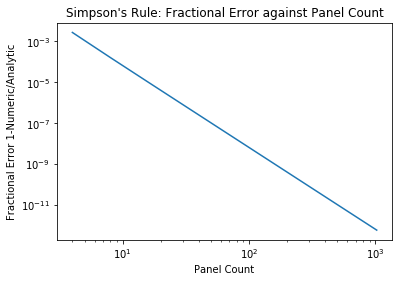

In [14]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
fraction = []
for i in panel_counts:
    x=integrate_numeric(x0,x1,i)
    fraction.append((result_analytic-x)/result_analytic)
plt.loglog(panel_counts,fraction)
plt.ylabel("Fractional Error 1-Numeric/Analytic")
plt.xlabel("Panel Count")
plt.title("Simpson's Rule: Fractional Error against Panel Count")

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

The greater the panel count the close the numeric result is to the analytic result up to a point. Once the panel number is too high however it passes a limit and then $\Delta$$x$ will be small enough such that, when you iterate and add it to the value of x for the next evaluation of f(x), the stored value of x will begin to accumulate error due to floating point storage being effectively approximate to the actual value and that in turn will affect the accuracy of the simpson approach.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

The trapezium rule will also increase in accuracy when panel count increases, and its accuracy will increase for longer as it won't pass the floating point limit as soon as Simpson's rule passes it. Once it passes the point, accuracy will also start wavering due to floating point storage.